# **PREDICTING STUDENTS GRADES**

**Description:**

This dataset contains student performance records, including scores in assignments, quizzes, midterms, and finals.It features individual student IDs, total marks, and corresponding letter grades.Useful for analyzing grading patterns, performance trends, and academic outcomes.

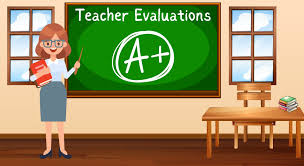

# Import Necessary Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew

# Loding the dataset

In [50]:
data=pd.read_csv('Students_Grading_Dataset.csv')

In [51]:
df=pd.DataFrame(data)

## STATISTICAL MEASURES

In [52]:
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Participation_Score,Projects_Score,...,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Sleep_Hours_per_Night_Entier,Country
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,47.50823,5.188714,50.79,...,F,14.0225,No,Yes,High School,Low,5,4.7,5,US
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,45.62664,4.855225,48.37,...,A,12.6600,No,No,NaN,Low,4,9.0,9,Japan
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,65.30870,6.865234,69.22,...,D,17.5750,No,Yes,Master's,Low,6,6.2,6,Japan
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,53.67973,5.401402,61.52,...,A,15.4075,No,Yes,High School,Low,3,6.7,7,Canada
4,S1004,John,Smith,student4@university.com,Female,23,CS,62.02994,5.575885,63.12,...,F,16.5325,No,Yes,High School,Low,2,7.1,7,Japan


In [53]:
df.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Participation_Score,Projects_Score,...,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Sleep_Hours_per_Night_Entier,Country
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,67.0,9.0,91.0,...,D,17.042,Yes,Yes,High School,High,10,8.3,8,US
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,95.0,6.0,65.0,...,C,19.192,Yes,Yes,NaN,High,4,4.0,4,Australia
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,59.0,8.0,97.0,...,A,10.850,No,No,High School,Low,4,6.3,6,Japan
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,51.0,8.0,91.0,...,A,11.168,No,Yes,Bachelor's,Low,1,8.4,8,Japan
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,97.0,9.0,78.0,...,F,15.572,Yes,Yes,PhD,High,2,6.1,6,Australia


In [54]:
df.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Participation_Score', 'Projects_Score',
       'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Sleep_Hours_per_Night_Entier', 'Country'],
      dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    5000 non-null   object 
 1   First_Name                    5000 non-null   object 
 2   Last_Name                     5000 non-null   object 
 3   Email                         5000 non-null   object 
 4   Gender                        5000 non-null   object 
 5   Age                           5000 non-null   int64  
 6   Department                    5000 non-null   object 
 7   Attendance (%)                5000 non-null   float64
 8   Participation_Score           5000 non-null   float64
 9   Projects_Score                5000 non-null   float64
 10  Total_Score                   5000 non-null   float64
 11  Grade                         5000 non-null   object 
 12  Study_Hours_per_Week          5000 non-null   float64
 13  Ext

In [56]:
df.shape

(5000, 21)

In [57]:
df.describe()

,Age,Attendance (%),Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Sleep_Hours_per_Night_Entier
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,21.048400,67.668931,6.573700,70.140270,75.121804,16.585848,5.48080,6.488140,6.539600
std,1.989786,13.644095,1.351952,14.659126,14.399941,3.514447,2.86155,1.452283,1.513965
min,18.000000,40.456000,3.857583,40.490000,50.020000,10.010000,1.00000,4.000000,4.000000
25%,19.000000,56.386493,5.451393,57.645000,62.835000,13.788667,3.00000,5.200000,5.000000
50%,21.000000,67.462190,6.553636,70.305000,75.395000,16.464500,5.00000,6.500000,7.000000
75%,23.000000,78.518355,7.609624,82.655000,87.652500,19.185250,8.00000,7.700000,8.000000
max,24.000000,100.000000,10.000000,99.430000,99.990000,24.997500,10.00000,9.000000,9.000000


# Handling Missing Values

Missing data is a common issue in data analysis and machine learning. Python provides several ways to handle missing values effectively.
1. Detection of Missing Values
2. Dropping Missing Values
3. Filling Missing Values
4. Advanced Imputation Methods
5. Using Algorithms that Handle Missing Values

In [58]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Participation_Score,0
Projects_Score,0


# Handling Duplicates

Duplicate data can skew analysis and machine learning results. Python, particularly with pandas, provides several methods to identify and handle duplicate values effectively.
1. Finding Duplicate Rows
2. Finding Duplicates Based on Specific Columns
3. Counting Duplicates
4. Removing Duplicates

In [59]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


In [60]:
df.duplicated().sum()

np.int64(0)

# Defining Target Variable

The target variable is the variable that you aim to predict or explain using other variables in the dataset.It is also called the dependent variable, response variable, or outcome variable.

In [61]:
y=df['Grade']
y

,Grade
0,F
1,A
2,D
3,A
4,F
...,...
4995,D
4996,C
4997,A
4998,A


In [62]:
x=df.drop('Grade',axis=1)

In [63]:
x.columns

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Participation_Score', 'Projects_Score',
       'Total_Score', 'Study_Hours_per_Week', 'Extracurricular_Activities',
       'Internet_Access_at_Home', 'Parent_Education_Level',
       'Family_Income_Level', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night',
       'Sleep_Hours_per_Night_Entier', 'Country'],
      dtype='object')

# Encoding

Encoding is the process of converting categorical (non-numeric) data into a numerical format so that machine learning algorithms can process it. Most ML models require inputs to be in numerical form, so encoding is a crucial step in data preprocessing

In [64]:
le=LabelEncoder()
y=le.fit_transform(y)
oh=OneHotEncoder()
df_pandas_encoded=pd.get_dummies(df,columns=['First_Name','Last_Name','Department','Grade','Extracurricular_Activities','Internet_Access_at_Home','Parent_Education_Level','Family_Income_Level','Country','Gender'],drop_first=True)
encoder=OneHotEncoder(sparse_output=False)
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(df[categorical_columns])
one_hot_df=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))
df_sklearn_encoded=pd.concat([df.drop(categorical_columns,axis=1),one_hot_df],axis=1)
print(f"One_Hot_Encoded Data using scikit_Learn:\n{df_sklearn_encoded}\n")


One_Hot_Encoded Data using scikit_Learn:
      Age  Attendance (%)  Participation_Score  Projects_Score  Total_Score  \
0      22        47.50823             5.188714           50.79        56.09   
1      18        45.62664             4.855225           48.37        50.64   
2      24        65.30870             6.865234           69.22        70.30   
3      24        53.67973             5.401402           61.52        61.63   
4      23        62.02994             5.575885           63.12        66.13   
...   ...             ...                  ...             ...          ...   
4995   19        67.00000             9.000000           91.00        85.21   
4996   19        95.00000             6.000000           65.00        95.96   
4997   24        59.00000             8.000000           97.00        54.25   
4998   23        51.00000             8.000000           91.00        55.84   
4999   21        97.00000             9.000000           78.00        77.86   

      Stud

In [65]:
df1=df_sklearn_encoded

In [66]:
df1.columns

Index(['Age', 'Attendance (%)', 'Participation_Score', 'Projects_Score',
       'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night', 'Sleep_Hours_per_Night_Entier',
       'Student_ID_S1000',
       ...
       'Parent_Education_Level_Master's', 'Parent_Education_Level_PhD',
       'Parent_Education_Level_nan', 'Family_Income_Level_High',
       'Family_Income_Level_Low', 'Country_Australia', 'Country_Canada',
       'Country_France', 'Country_Japan', 'Country_US'],
      dtype='object', length=10050)

In [67]:
df_cleaned=df.drop(columns=['Student_ID'])

In [68]:
columns = df_cleaned.select_dtypes(include=["int64", "float64"]).columns.tolist()
df_num = df_cleaned[columns]
df_num.describe()

,Age,Attendance (%),Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Sleep_Hours_per_Night_Entier
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,21.048400,67.668931,6.573700,70.140270,75.121804,16.585848,5.48080,6.488140,6.539600
std,1.989786,13.644095,1.351952,14.659126,14.399941,3.514447,2.86155,1.452283,1.513965
min,18.000000,40.456000,3.857583,40.490000,50.020000,10.010000,1.00000,4.000000,4.000000
25%,19.000000,56.386493,5.451393,57.645000,62.835000,13.788667,3.00000,5.200000,5.000000
50%,21.000000,67.462190,6.553636,70.305000,75.395000,16.464500,5.00000,6.500000,7.000000
75%,23.000000,78.518355,7.609624,82.655000,87.652500,19.185250,8.00000,7.700000,8.000000
max,24.000000,100.000000,10.000000,99.430000,99.990000,24.997500,10.00000,9.000000,9.000000


# Handling Outliers

Outliers are data points that significantly differ from other observations in a dataset. They are unusually high or low values that lie far away from the majority of the data points.

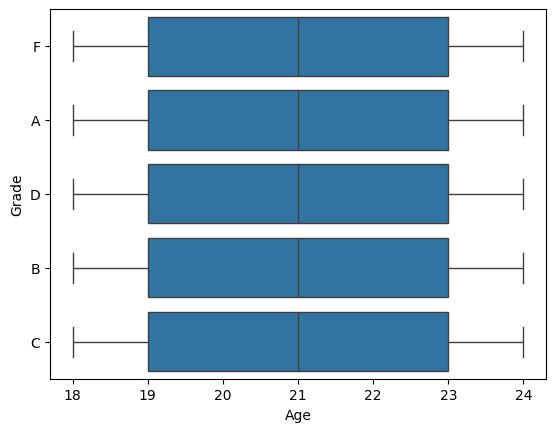

In [69]:
sns.boxplot(x='Age',y='Grade',data=df)
plt.show()

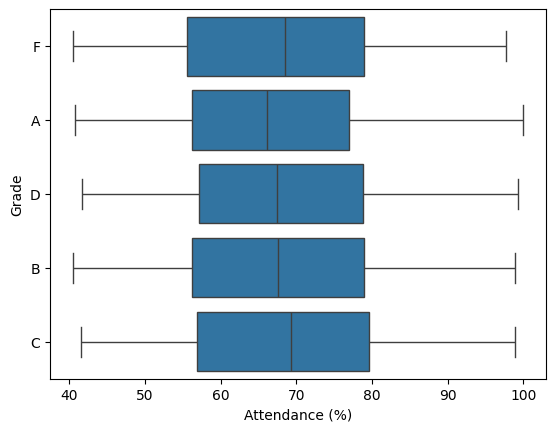

In [70]:
sns.boxplot(x='Attendance (%)',y='Grade',data=df)
plt.show()

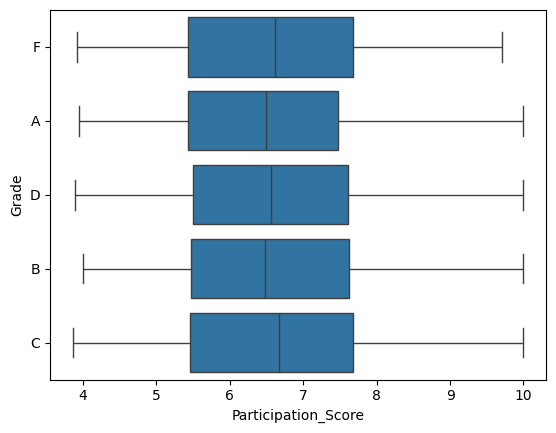

In [71]:
sns.boxplot(x='Participation_Score',y='Grade',data=df)
plt.show()

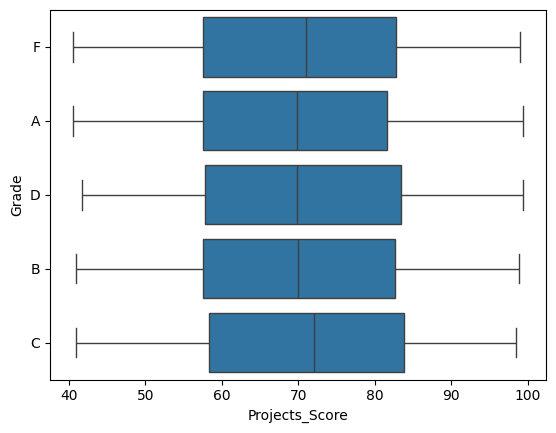

In [72]:
sns.boxplot(x='Projects_Score',y='Grade',data=df)
plt.show()

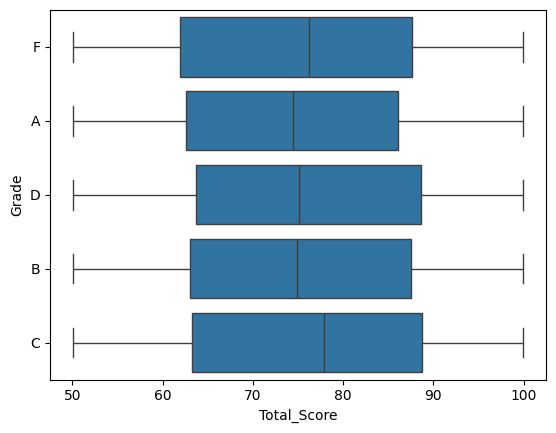

In [73]:
sns.boxplot(x='Total_Score',y='Grade',data=df)
plt.show()

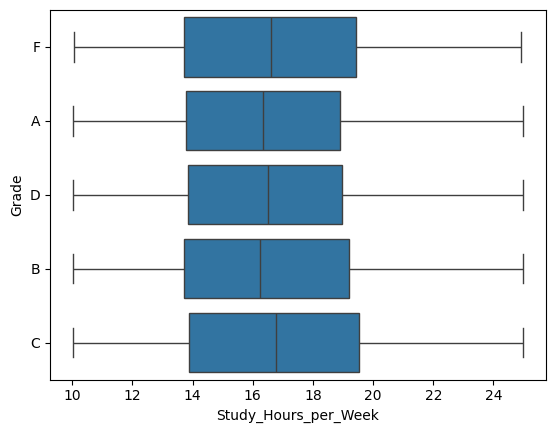

In [74]:
sns.boxplot(x='Study_Hours_per_Week',y='Grade',data=df)
plt.show()

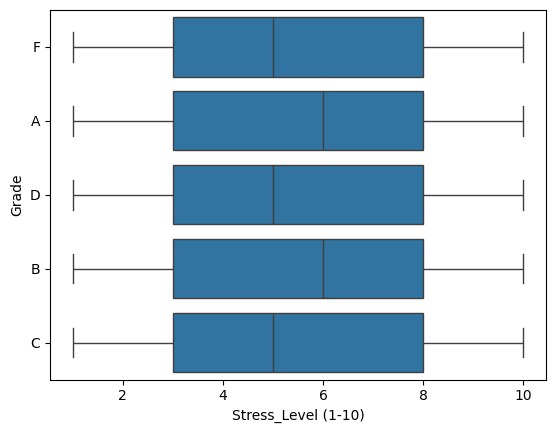

In [75]:
sns.boxplot(x='Stress_Level (1-10)',y='Grade',data=df)
plt.show()

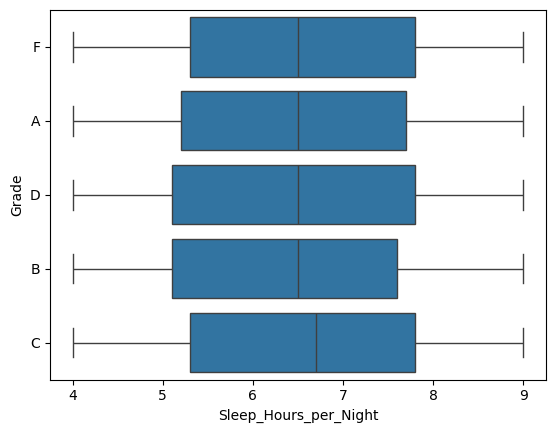

In [76]:
sns.boxplot(x='Sleep_Hours_per_Night',y='Grade',data=df)
plt.show()

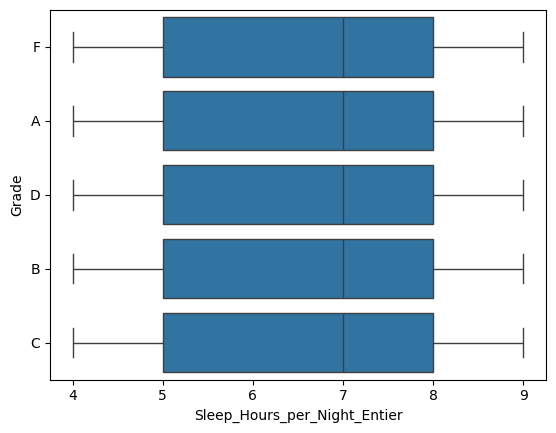

In [77]:
sns.boxplot(x='Sleep_Hours_per_Night_Entier',y='Grade',data=df)
plt.show()

# Skewness

In [78]:
df1.skew

<bound method DataFrame.skew of       Age  Attendance (%)  Participation_Score  Projects_Score  Total_Score  \
0      22        47.50823             5.188714           50.79        56.09   
1      18        45.62664             4.855225           48.37        50.64   
2      24        65.30870             6.865234           69.22        70.30   
3      24        53.67973             5.401402           61.52        61.63   
4      23        62.02994             5.575885           63.12        66.13   
...   ...             ...                  ...             ...          ...   
4995   19        67.00000             9.000000           91.00        85.21   
4996   19        95.00000             6.000000           65.00        95.96   
4997   24        59.00000             8.000000           97.00        54.25   
4998   23        51.00000             8.000000           91.00        55.84   
4999   21        97.00000             9.000000           78.00        77.86   

      Study_Hours_per_Week  Stress_Level (1-10)  Sleep_Hours_per_Night  \
0                  14.0225                    5                    4.7   
1                  12.6600                    4                    9.0   
2                  17.5750                    6                    6.2   
3                  15.4075                    3                    6.7   
4                  16.5325                    2                    7.1   
...                    ...                  ...                    ...   
4995               17.0420                   10                    8.3   
4996               19.1920                    4                    4.0   
4997               10.8500                    4                    6.3   
4998               11.1680                    1                    8.4   
4999               15.5720                    2                    6.1   

      Sleep_Hours_per_Night_Entier  Student_ID_S1000  ...  \
0                                5               1.0  ...   
1                                9               0.0  ...   
2                                6               0.0  ...   
3                                7               0.0  ...   
4                                7               0.0  ...   
...                            ...               ...  ...   
4995                             8               0.0  ...   
4996                             4               0.0  ...   
4997                             6               0.0  ...   
4998                             8               0.0  ...   
4999                             6               0.0  ...   

      Parent_Education_Level_Master's  Parent_Education_Level_PhD  \
0                                 0.0                         0.0   
1                                 0.0                         0.0   
2                                 1.0                         0.0   
3                                 0.0                         0.0   
4                                 0.0                         0.0   
...                               ...                         ...   
4995                              0.0                         0.0   
4996                              0.0                         0.0   
4997                              0.0                         0.0   
4998                              0.0                         0.0   
4999                              0.0                         1.0   

      Parent_Education_Level_nan  Family_Income_Level_High  \
0                            0.0                       0.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            0.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
4995                         0.0                       1.0   
4996                         1.0                       1.0   
4997      

# VISUALIZATION

**Boxplot**

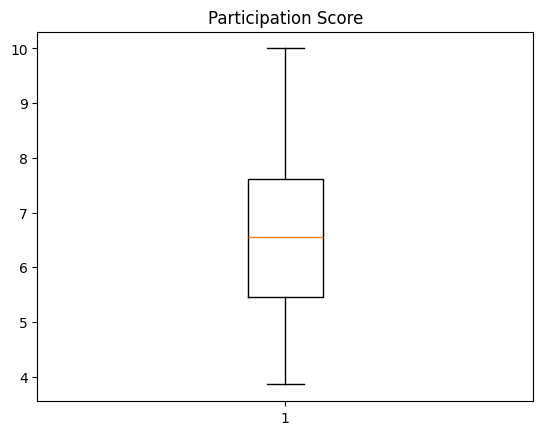

In [79]:
a=df['Participation_Score']
plt.boxplot(a)
plt.title('Participation Score')
plt.show()

**Line plot**

<ipython-input-80-73949cfbd129>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


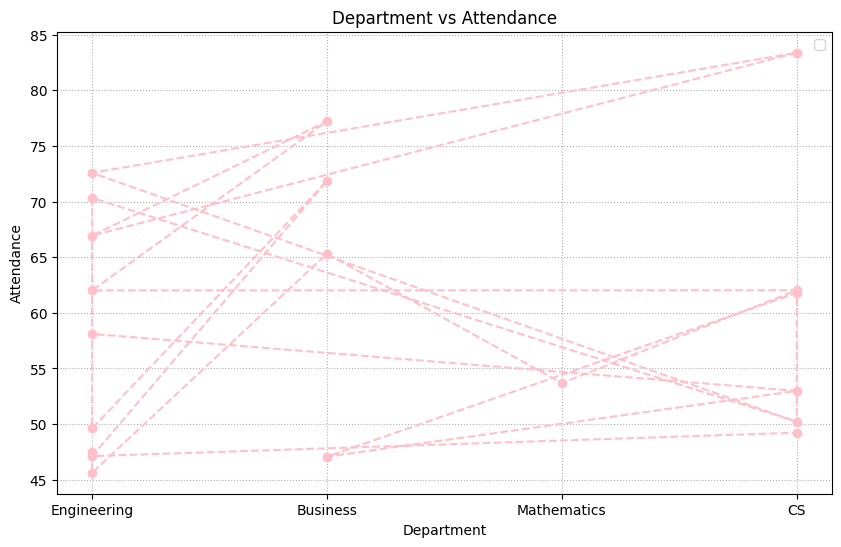

In [80]:
x=df['Department'].head(20)
y=df['Attendance (%)'].head(20)
plt.figure(figsize=(10,6))
plt.xlabel("Department")
plt.ylabel("Attendance")
plt.title('Department vs Attendance')
plt.plot(x,y,color='pink',linestyle='--',marker='o')
plt.grid(True,linestyle=':')
plt.legend()
plt.show()

**Bar chart**

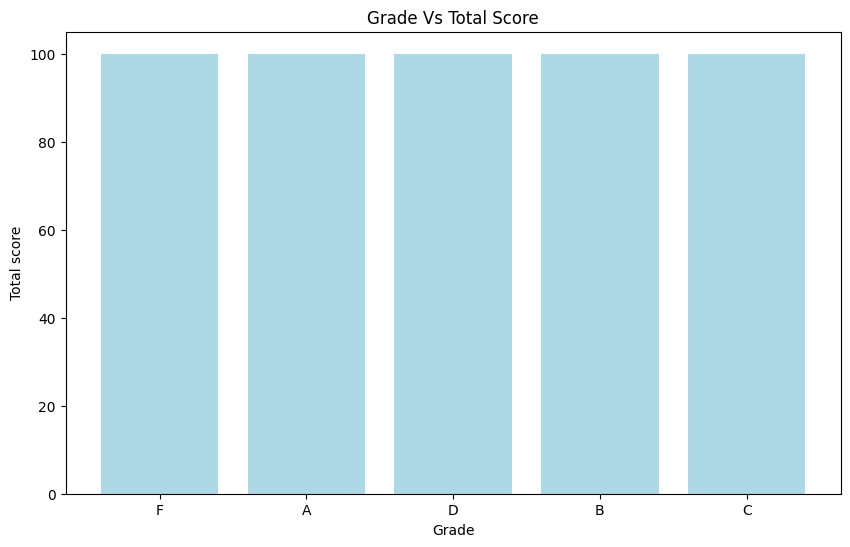

In [81]:
x=df['Grade']
y=df['Total_Score']
plt.figure(figsize=(10,6))
plt.xlabel('Grade')
plt.ylabel('Total score')
plt.title('Grade Vs Total Score')
plt.bar(x,y,color='Lightblue')
plt.show()

**Histogram**

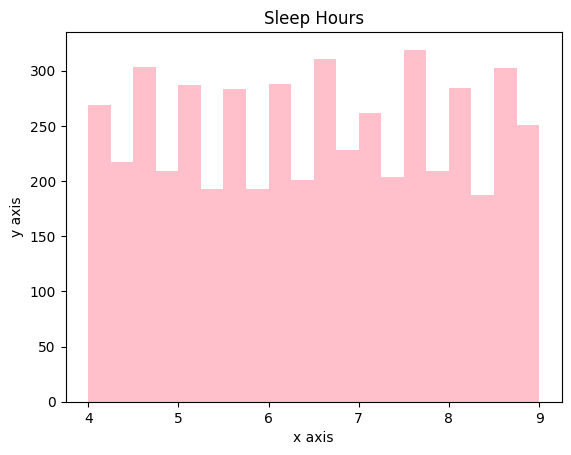

In [82]:
x=df['Sleep_Hours_per_Night']
plt.hist(x,bins=20,color='pink')
plt.title('Sleep Hours')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

**Heat Map**

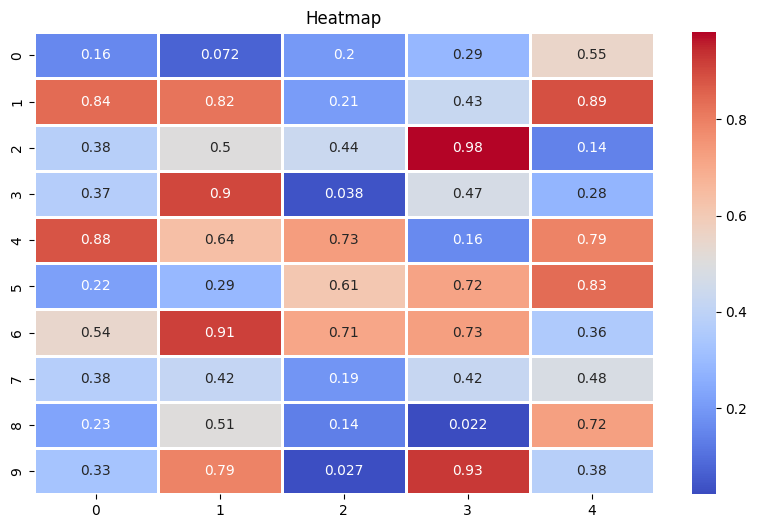

In [83]:
data=np.random.rand(10,5)
plt.figure(figsize=(10,6))
sns.heatmap(data,annot=True,cmap='coolwarm',linewidth=1.0)
plt.title('Heatmap')
plt.show()

**Scatter plot**

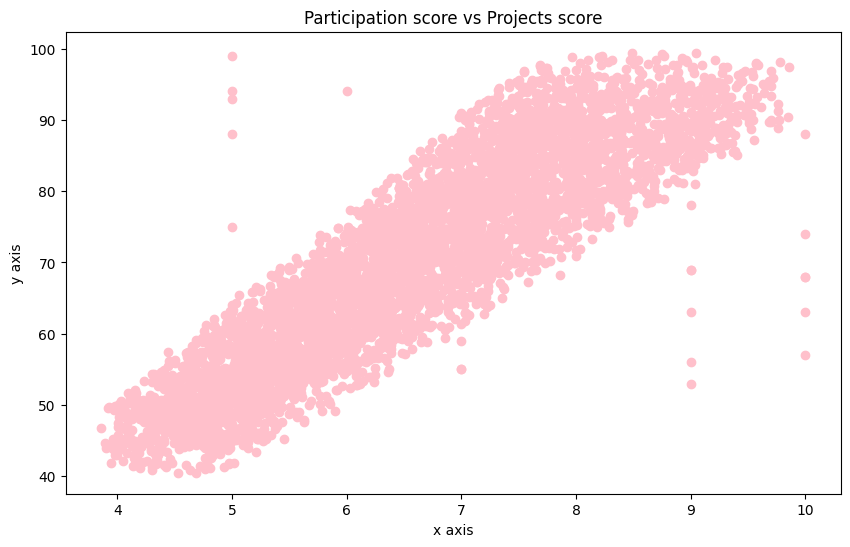

In [84]:
x=df['Participation_Score']
y=df['Projects_Score']
scatter_data=np.random.rand(10,2)
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='pink',marker='o')
plt.title('Participation score vs Projects score')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

**KDE plot**

In [85]:
df1

,Age,Attendance (%),Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Sleep_Hours_per_Night_Entier,Student_ID_S1000,...,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Parent_Education_Level_nan,Family_Income_Level_High,Family_Income_Level_Low,Country_Australia,Country_Canada,Country_France,Country_Japan,Country_US
0,22,47.50823,5.188714,50.79,56.09,14.0225,5,4.7,5,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,18,45.62664,4.855225,48.37,50.64,12.6600,4,9.0,9,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,24,65.30870,6.865234,69.22,70.30,17.5750,6,6.2,6,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,24,53.67973,5.401402,61.52,61.63,15.4075,3,6.7,7,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,23,62.02994,5.575885,63.12,66.13,16.5325,2,7.1,7,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19,67.00000,9.000000,91.00,85.21,17.0420,10,8.3,8,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4996,19,95.00000,6.000000,65.00,95.96,19.1920,4,4.0,4,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4997,24,59.00000,8.000000,97.00,54.25,10.8500,4,6.3,6,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4998,23,51.00000,8.000000,91.00,55.84,11.1680,1,8.4,8,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


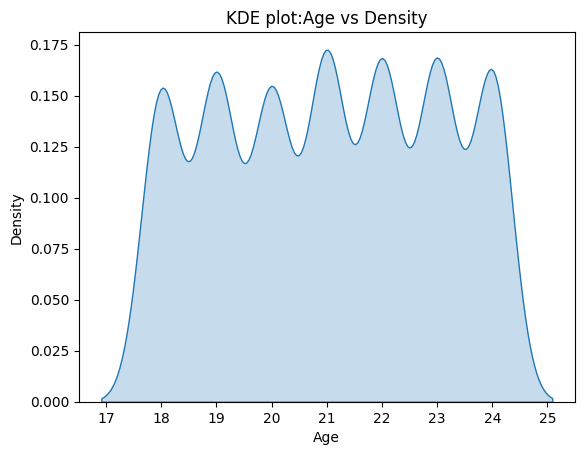

In [86]:
sns.kdeplot(x=df['Age'],fill=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('KDE plot:Age vs Density')
plt.show()

# Feature Selection

Feature selection is the process of choosing the most relevant and important variables (features) from a dataset to improve model performance. It reduces noise, overfitting, and computational cost while enhancing interpretability.

In [87]:
x = df.select_dtypes(include=['number'])
if 'unnamed: 0' in x.columns:
    x = x.drop('unnamed: 0', axis=1)
y = df['Grade']
selecter = SelectKBest(score_func=f_classif, k=14)
x_new = selecter.fit_transform(x, y)
selected_features_num = x.columns[selecter.get_support()]
features_score = pd.DataFrame({'Features': selected_features_num, 'Scores': selecter.scores_[selecter.get_support()]})
features_score = features_score.sort_values(by='Scores', ascending=False)
print(features_score)

                       Features    Scores
1                Attendance (%)  2.792906
4                   Total_Score  1.943616
5          Study_Hours_per_Week  1.593280
8  Sleep_Hours_per_Night_Entier  1.497206
2           Participation_Score  1.497049
7         Sleep_Hours_per_Night  1.391339
3                Projects_Score  1.200826
0                           Age  1.046838
6           Stress_Level (1-10)  0.932816


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=14 is greater than n_features=9. All the features will be returned.
  warnings.warn(


# Train and Test the Model

Training and testing a model involves splitting data, preprocessing, fitting a model, evaluating performance, and tuning for better accuracy.

In [88]:
x_selected=x[selected_features_num]
x_selected.columns
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_selected,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 9)
(1000, 9)
(4000,)
(1000,)


# Scaling

Scaling is a preprocessing technique used to standardize or normalize the range of independent features (variables) in a dataset. It ensures that all numerical features contribute equally to model performance by bringing them to a similar scale.

In [89]:
Ss=StandardScaler()
x_test_scaled=Ss.fit_transform(x_test)
x_train_scaled=Ss.fit_transform(x_train)

# Building the Model

Building a model refers to the process of training a machine learning algorithm on data to make predictions or decisions without being explicitly programmed. It involves selecting an algorithm, feeding it data, optimizing its performance, and validating its accuracy.



In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
classifiers={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'SVC':SVC(),
    'RandomForestClassifier':RandomForestClassifier()
}
for name,clf in classifiers.items():
    clf.fit(x_train_scaled,y_train)
    y_pred=clf.predict(x_test_scaled)
    print(f"\n{name}Results:")
    print("Accuracy:",accuracy_score(y_test,y_pred))
    print("\n confusion matrix:")
    print(confusion_matrix(y_test,y_pred))
    print("\n Classification_report:")
    print(classification_report(y_test,y_pred))



LogisticRegressionResults:
Accuracy: 0.294

 confusion matrix:
[[293   3   1   1   0]
 [178   0   1   1   0]
 [154   4   0   3   0]
 [172   3   0   1   0]
 [180   2   1   2   0]]

 Classification_report:
              precision    recall  f1-score   support

           A       0.30      0.98      0.46       298
           B       0.00      0.00      0.00       180
           C       0.00      0.00      0.00       161
           D       0.12      0.01      0.01       176
           F       0.00      0.00      0.00       185

    accuracy                           0.29      1000
   macro avg       0.08      0.20      0.09      1000
weighted avg       0.11      0.29      0.14      1000


DecisionTreeClassifierResults:
Accuracy: 0.226

 confusion matrix:
[[89 62 48 50 49]
 [59 37 30 22 32]
 [44 25 29 33 30]
 [53 36 21 34 32]
 [48 39 25 36 37]]

 Classification_report:
              precision    recall  f1-score   support

           A       0.30      0.30      0.30       298
           B 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



SVCResults:
Accuracy: 0.293

 confusion matrix:
[[291   3   0   4   0]
 [179   1   0   0   0]
 [156   2   0   3   0]
 [169   6   0   1   0]
 [179   3   0   3   0]]

 Classification_report:
              precision    recall  f1-score   support

           A       0.30      0.98      0.46       298
           B       0.07      0.01      0.01       180
           C       0.00      0.00      0.00       161
           D       0.09      0.01      0.01       176
           F       0.00      0.00      0.00       185

    accuracy                           0.29      1000
   macro avg       0.09      0.20      0.10      1000
weighted avg       0.12      0.29      0.14      1000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



RandomForestClassifierResults:
Accuracy: 0.246

 confusion matrix:
[[167  53  22  33  23]
 [106  29  13  16  16]
 [ 88  25  14  20  14]
 [107  24  12  23  10]
 [ 92  37  18  25  13]]

 Classification_report:
              precision    recall  f1-score   support

           A       0.30      0.56      0.39       298
           B       0.17      0.16      0.17       180
           C       0.18      0.09      0.12       161
           D       0.20      0.13      0.16       176
           F       0.17      0.07      0.10       185

    accuracy                           0.25      1000
   macro avg       0.20      0.20      0.19      1000
weighted avg       0.21      0.25      0.21      1000



In [91]:
print("The Best Model is : Random Forest Classifier")

The Best Model is : Random Forest Classifier
